In [22]:
# auto reload modules 
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Users/sebas/git')

import numpy as np
import os
import glob
import pandas as pd 
import h5py
import pickle
import cv2 as cv

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.path import Path

import scipy.signal as signal
from scipy.interpolate import LinearNDInterpolator, griddata
import sympy as sp

from datetime import datetime,timedelta
import pytz

from shapely.geometry import Polygon, Point
from scipy.spatial import ConvexHull

import icewave.tools.matlab2python as mat2py
import icewave.sebastien.set_graphs as set_graphs
import icewave.drone.drone_projection as dp
import icewave.tools.matlab_colormaps as matcmaps
import icewave.tools.Fourier_tools as FT
import icewave.tools.rw_data as rw 
import icewave.gps.gps_seb as gps_seb
# import icewave.gps.gps as gps

# PARULA COLORMAP 
parula_map = matcmaps.parula()

plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='Computer Modern')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load picture 

In [3]:
date = '0226'
drone_ID = 'mesange'
exp_ID = '12-FRAC_001'

main_path = 'K:/Share_hublot/'
path2img = f'{main_path}Data/{date}/Drones/{drone_ID}/{exp_ID}/images/'
filelist = glob.glob(f'{path2img}*.tiff')
file2load = filelist[0]

img = cv.imread(file2load)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_name = file2load.split('.')[-2]


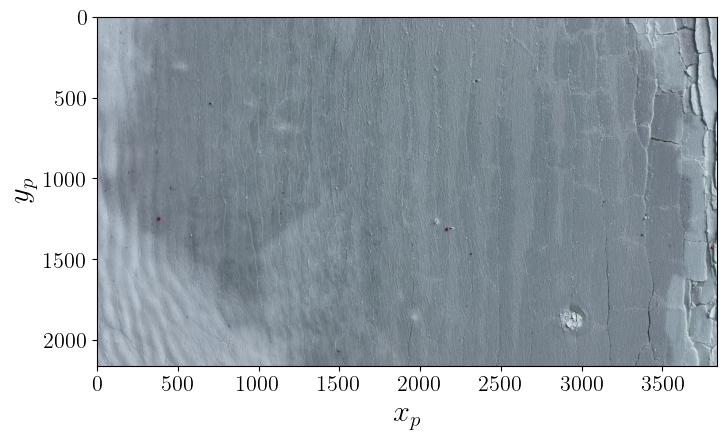

In [7]:
set_graphs.set_matplotlib_param('single')
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_xlabel(r'$x_p $',labelpad = 5)
ax.set_ylabel(r'$y_p $',labelpad = 5)
ax.set_aspect(1) # set aspect ratio to 1 

### Set drone parameters

In [8]:
param_dict = {}
param_dict['H'] = 64.5
param_dict['alpha_0'] = 90
param_dict['focale'] = 2700

param_dict['latitude'] = 48.3483593013523
param_dict['longitude'] = -68.8142667788416
param_dict['azimuth'] = 170.2

### Georectify image

In [10]:
[ny,nx,nc] = np.shape(img) 

x_edges = np.arange(0,nx + 1)
y_edges = np.arange(0,ny + 1)

x0 = (nx + 1) / 2
y0 = (ny + 1) / 2

Yedges,Xedges = np.meshgrid(y_edges,x_edges,indexing = 'ij')

# compute real coordinates for each pixels of the image 
Xreal,Yreal = dp.projection_real_space(Xedges,Yedges,x0,y0,param_dict['H'],param_dict['alpha_0']*np.pi/180,
                                       param_dict['focale'])


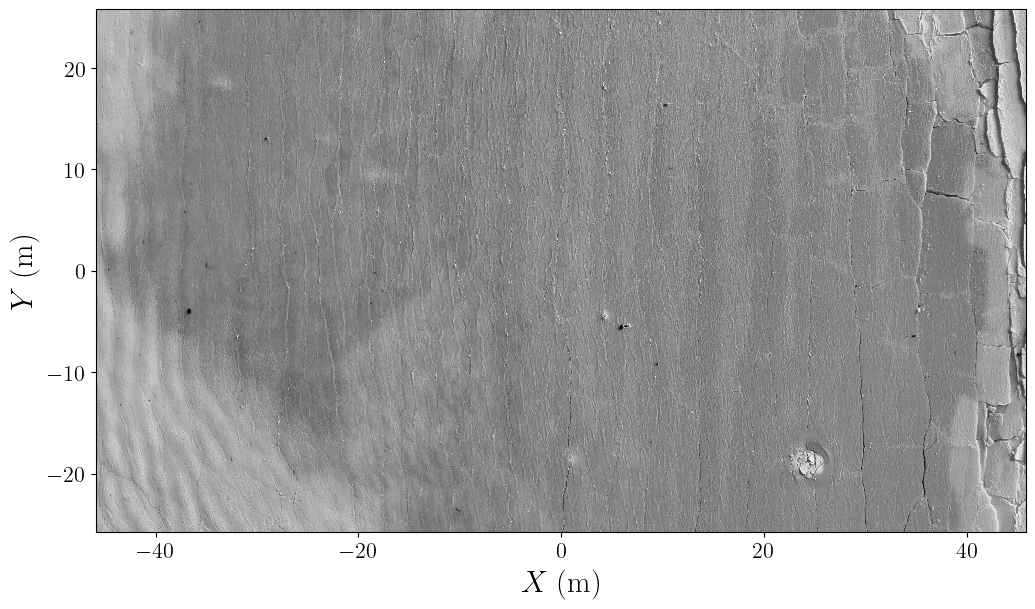

In [18]:
fig, ax = plt.subplots(figsize = (12,9))
c = ax.pcolormesh(Xreal,Yreal,img[:,:,1],shading = 'auto', cmap = 'gray')
ax.set_xlabel(r'$X \; \mathrm{(m)}$',labelpad = 5)
ax.set_ylabel(r'$Y \; \mathrm{(m)}$',labelpad = 5)
ax.set_aspect(1) # set aspect ratio to 1 

c.set_rasterized(True)

### Georeference image

In [11]:
# horizontal distance between center of metric coordinates and drone position 
dist2drone = param_dict['H']/np.tan(param_dict['alpha_0']*np.pi/180)
Lat0,Long0 = dp.LatLong_coords_from_referencepoint(param_dict['latitude'],param_dict['longitude'],
                                                param_dict['azimuth'],dist2drone)

rho,theta = dp.cart2pol(Xreal,Yreal)
theta = theta*180/np.pi # angle with respect to the drone orientation 
local_azimuth = param_dict['azimuth'] + 90 - theta 
# GPS coordinates of all pixels
Lat,Long = dp.LatLong_coords_from_referencepoint(Lat0,Long0,
                                                local_azimuth,rho)


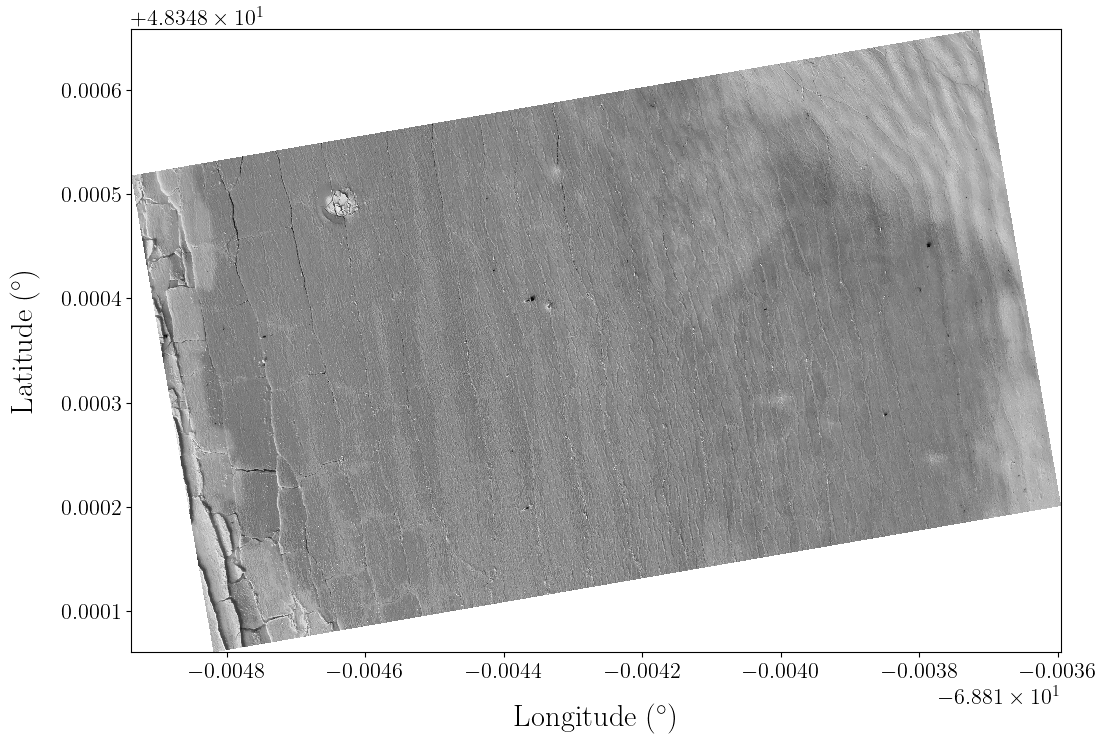

In [20]:
fig,ax = plt.subplots(figsize = (12,9))
c = ax.pcolormesh(Long,Lat,img[:,:,1],shading = 'auto',cmap = 'gray')
ax.set_xlabel(r'Longitude $(^\circ)$',labelpad = 15)
ax.set_ylabel(r'Latitude $(^\circ)$',labelpad = 15)
ax.set_aspect(1/np.cos(Lat0*np.pi/180)) # scaling y/x


c.set_rasterized(True)

### Load GPS positions

In [23]:
path2gps = f'{main_path}Data/{date}/GPS/'
filelist = glob.glob(f'{path2gps}*.gpx')
file2load = filelist[0]
gpx = gps_seb.get_gpx(file2load)

waypoint Sag240288 -> (48.348653,-68.799496)
waypoint Sag240289 -> (48.347318,-68.80523)
waypoint Sag240290 -> (48.347681,-68.809319)
waypoint Sag240291 -> (48.34765,-68.809562)
waypoint Sag240292 -> (48.347664,-68.809648)
waypoint Sag240293 -> (48.347902,-68.810624)
waypoint Sag240294 -> (48.347938,-68.81077)
waypoint Sag240295 -> (48.348046,-68.811198)
waypoint Sag240296 -> (48.348378,-68.813141)
waypoint Sag240297 -> (48.348591,-68.81318)
waypoint Sag240298 -> (48.348618,-68.813167)
waypoint Sag240299 -> (48.348378,-68.814837)
waypoint Sag240300 -> (48.34837,-68.814728)
waypoint Sag240301 -> (48.347961,-68.814634)
waypoint Sag240302 -> (48.348413,-68.814125)
waypoint Sag240303 -> (48.348008,-68.814036)
waypoint Sag240304 -> (48.348008,-68.814037)
waypoint Sag240305 -> (48.348178,-68.814366)
waypoint Sag240306 -> (48.348333,-68.814817)
waypoint Sag240307 -> (48.348334,-68.814835)
waypoint Sag240308 -> (48.348319,-68.814858)
waypoint Sag240309 -> (48.348326,-68.814903)
waypoint Sag240